# Numerical data scaling

## Linear transformations

In [21]:
import timeit
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets, linear_model

X, y = datasets.load_diabetes(return_X_y=True)
raw = X[:, None, 2]

## Escalation rules

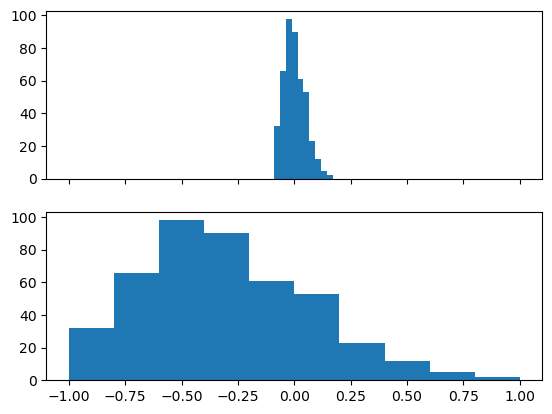

In [11]:
max_raw = max(raw)
min_raw = min(raw)

scaled = (2 * raw - max_raw - min_raw) / (max_raw - min_raw)

fig, axes = plt.subplots(2, 1, sharex=True)

axes[0].hist(raw)
axes[1].hist(scaled)

plt.show()

## Training models

In [12]:
def train_model(data):
  linear_model.LinearRegression().fit(data, y)

In [19]:
raw_time = timeit.timeit(lambda: train_model(raw), number=100)
scaled_time = timeit.timeit(lambda: train_model(scaled), number=100)

print('train raw: {}'.format(raw_time))
print('train scaled: {}'.format(scaled_time))

train raw: 0.06941449900000407
train scaled: 0.04547129900015534


- `max-min scaling`: best for evenly distributed data
- `x-score scaling`: best for "normally" distributed data (Gaussian bell shape)

# Nonlinear transformations

In [22]:
df = pd.read_csv('../csv/cars.csv')

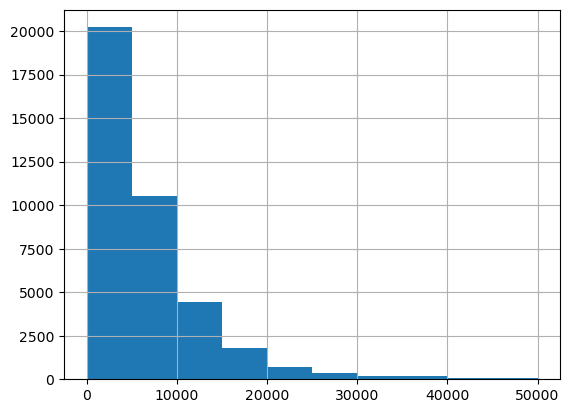

In [24]:
df.price_usd.hist()
plt.show()

## Transformation with $tanh(x)$

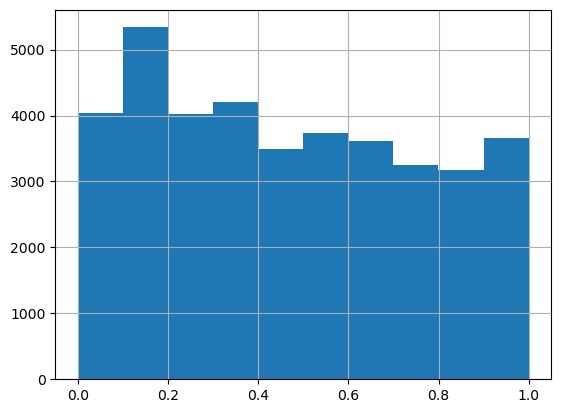

In [26]:
p = 10000
df.price_usd.apply(lambda x: np.tanh(x/p)).hist()

plt.show()